In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

Init Plugin
Init Graph Optimizer
Init Kernel


In [5]:
os.getcwd()

'/Users/ilkaygirgin/Desktop/project/TFODCourse/news'

In [45]:
import glob
from PIL import Image

cur_path = os.getcwd()
path = os.path.join(cur_path,'dataset','test')

for img_file in glob.glob(path + '/*.jpg'):
    image = Image.open(img_file)
    print(image.size)
    image.thumbnail((1024, 1024))
    print(image.size)
    image.save(img_file)

    

(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1440, 1080)
(1024, 768)
(1440, 1080)
(1024, 768)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1440, 1080)
(1024, 768)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1440, 1080)
(1024, 768)
(1440, 1080)
(1024, 768)
(1440, 1080)
(1024, 768)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1440, 1080)
(1024, 768)
(1080, 1440)
(768, 1024)
(1440, 1080)
(1024, 768)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1440, 1080)
(1024, 768)
(1440, 1080)
(1024, 768)
(1080, 1440)
(768, 1024)
(1440, 1080)
(1024, 768)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1080, 1440)
(768, 1024)
(1440, 1080)
(1024, 768)
(1080, 1440)
(768, 1024)


In [22]:
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET

def recalc(valcalc, widtheight):
    newcalc = valcalc*(0.7111111)
    if widtheight == 1440:
        newcalc = newcalc/1024
    else:
        newcalc = newcalc/768
    newcalc = round(newcalc,2)
    print(newcalc)
    return newcalc

def recalc_last(calcval):
    newcalc = calcval*(0.7111111)
    newcalc = round(newcalc,0)
    print(newcalc)
    return newcalc
    
    
cur_path = os.getcwd()
path = os.path.join(cur_path,'dataset','xml_files')
csv_list = []
column_name = ['test', 'path', 'class', 'border1', 'border2', 'commas1', 'border3', 'border4', 'commas2']
three_commas = ',,'
two_commas = ','
print(path)

for xml_file in glob.glob(path + '/*.xml'):
    tree = ET.parse(xml_file)
    root = tree.getroot()
    print('test')
    for member in root.findall('object'):
        value = ('TRAIN',
                 root.find('file').text,
                 member[0].text,
                 int(recalc_last(int(member[5][0].text))),#,int(root.find('size')[0].text))),
                 int(recalc_last(int(member[5][1].text))),#,int(root.find('size')[1].text))),
                 three_commas,
                 int(recalc_last(int(member[5][2].text))),#,int(root.find('size')[0].text))),
                 int(recalc_last(int(member[5][3].text))),#,int(root.find('size')[1].text))),
                 two_commas
                )
        csv_list.append(value)
        print(value)
csv_df = pd.DataFrame(csv_list, columns=column_name)
csv_df.to_csv('dataset/train_val_recalc.csv', index=None)
            

/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/xml_files
test
109.0
361.0
166.0
408.0
('TRAIN', 'IMG_1336.jpg', 'Gevsek Yamac (Loose Slope)', 109, 361, ',,', 166, 408, ',')
632.0
366.0
675.0
407.0
('TRAIN', 'IMG_1336.jpg', 'Gevsek Yamac (Loose Slope)', 632, 366, ',,', 675, 407, ',')
test
569.0
285.0
663.0
362.0
('TRAIN', 'IMG_0996.jpg', 'Kaygan yol (Slippery road)', 569, 285, ',,', 663, 362, ',')
test
242.0
347.0
303.0
405.0
('TRAIN', 'IMG_1450.jpg', 'Bir Sonraki Kavsakta Gecis Hakki (Right-of-way at the next intersection)', 242, 347, ',,', 303, 405, ',')
test
378.0
363.0
396.0
381.0
('TRAIN', 'IMG_5622.jpg', 'Yayalar (Pedestrians)', 378, 363, ',,', 396, 381, ',')
378.0
377.0
397.0
395.0
('TRAIN', 'IMG_5622.jpg', '30km_h Hiz Limiti (Speed limit)', 378, 377, ',,', 397, 395, ',')
644.0
336.0
669.0
356.0
('TRAIN', 'IMG_5622.jpg', 'Yayalar (Pedestrians)', 644, 336, ',,', 669, 356, ',')
646.0
353.0
665.0
370.0
('TRAIN', 'IMG_5622.jpg', '30km_h Hiz Limiti (Speed limit)', 646, 353

360.0
481.0
381.0
502.0
('TRAIN', 'IMG_1872.jpg', 'Gecis Yasagi Sonu (End of no passing)', 360, 481, ',,', 381, 502, ',')
test
225.0
307.0
248.0
331.0
('TRAIN', 'IMG_5433.jpg', 'Duz veya Sola Gidis (Go straight or left)', 225, 307, ',,', 248, 331, ',')
test
28.0
256.0
70.0
299.0
('TRAIN', 'IMG_5355.jpg', 'Yol Ver (Yield)', 28, 256, ',,', 70, 299, ',')
809.0
277.0
845.0
310.0
('TRAIN', 'IMG_5355.jpg', 'Yol Ver (Yield)', 809, 277, ',,', 845, 310, ',')
test
184.0
306.0
281.0
402.0
('TRAIN', 'IMG_1133.jpg', 'Sagdan Gidiniz (Keep right)', 184, 306, ',,', 281, 402, ',')
test
496.0
393.0
566.0
459.0
('TRAIN', 'IMG_1127.jpg', 'Trafik Isiklari (Traffic signals)', 496, 393, ',,', 566, 459, ',')
test
384.0
245.0
411.0
272.0
('TRAIN', 'IMG_5341.jpg', 'Trafik Isiklari (Traffic signals)', 384, 245, ',,', 411, 272, ',')
622.0
262.0
644.0
283.0
('TRAIN', 'IMG_5341.jpg', 'Trafik Isiklari (Traffic signals)', 622, 262, ',,', 644, 283, ',')
test
363.0
325.0
388.0
348.0
('TRAIN', 'IMG_5427.jpg', 'Bir Sonra

191.0
281.0
221.0
316.0
('TRAIN', 'IMG_5455.jpg', 'U Donusu Yasak (U Turn is not allowed)', 191, 281, ',,', 221, 316, ',')
test
450.0
430.0
486.0
462.0
('TRAIN', 'IMG_1633.jpg', 'Saga Tehlikeli Viraj (Dangerous curve to the right)', 450, 430, ',,', 486, 462, ',')
test
0.0
385.0
21.0
412.0
('TRAIN', 'IMG_1155.jpg', 'Bir Sonraki Kavsakta Gecis Hakki (Right-of-way at the next intersection)', 0, 385, ',,', 21, 412, ',')
213.0
383.0
238.0
407.0
('TRAIN', 'IMG_1155.jpg', 'Bir Sonraki Kavsakta Gecis Hakki (Right-of-way at the next intersection)', 213, 383, ',,', 238, 407, ',')
516.0
346.0
568.0
404.0
('TRAIN', 'IMG_1155.jpg', 'Okul Gecidi (School passing)', 516, 346, ',,', 568, 404, ',')
test
605.0
318.0
621.0
336.0
('TRAIN', 'IMG_5333.jpg', 'Soldan Gidiniz (Keep left)', 605, 318, ',,', 621, 336, ',')
712.0
287.0
730.0
306.0
('TRAIN', 'IMG_5333.jpg', '30km_h Hiz Limiti (Speed limit)', 712, 287, ',,', 730, 306, ',')
test
717.0
271.0
747.0
304.0
('TRAIN', 'IMG_5327.jpg', '70km_h Hiz Limiti (Spe

test
876.0
262.0
943.0
329.0
('TRAIN', 'IMG_5273.jpg', 'Soldan Gidiniz (Keep left)', 876, 262, ',,', 943, 329, ',')
test
393.0
312.0
442.0
361.0
('TRAIN', 'IMG_1015.jpg', 'Bir Sonraki Kavsakta Gecis Hakki (Right-of-way at the next intersection)', 393, 312, ',,', 442, 361, ',')
test
449.0
336.0
466.0
353.0
('TRAIN', 'IMG_5501.jpg', 'Yaya Gecidi (Crosswalk)', 449, 336, ',,', 466, 353, ',')
test
462.0
405.0
513.0
452.0
('TRAIN', 'IMG_1767.jpg', 'Engebeli Yol (Bumpy road)', 462, 405, ',,', 513, 452, ',')
469.0
448.0
508.0
486.0
('TRAIN', 'IMG_1767.jpg', '50km_h Hiz Limiti (Speed limit)', 469, 448, ',,', 508, 486, ',')
test
271.0
353.0
287.0
369.0
('TRAIN', 'IMG_5267.jpg', 'Duz veya Sola Gidis (Go straight or left)', 271, 353, ',,', 287, 369, ',')
test
612.0
53.0
693.0
131.0
('TRAIN', 'IMG_2508.jpg', 'Bir Sonraki Kavsakta Gecis Hakki (Right-of-way at the next intersection)', 612, 53, ',,', 693, 131, ',')
test
96.0
364.0
140.0
407.0
('TRAIN', 'IMG_5529.jpg', 'Oncelikli Yol (Priority road)', 

375.0
('TRAIN', 'IMG_1048.jpg', '50km_h Hiz Limiti (Speed limit)', 533, 328, ',,', 585, 375, ',')
590.0
323.0
635.0
375.0
('TRAIN', 'IMG_1048.jpg', '50km_h Hiz Limiti (Speed limit)', 590, 323, ',,', 635, 375, ',')
test
116.0
294.0
159.0
333.0
('TRAIN', 'IMG_5548.jpg', 'Duz veya Sola Gidis (Go straight or left)', 116, 294, ',,', 159, 333, ',')
test
473.0
417.0
491.0
432.0
('TRAIN', 'IMG_5212.jpg', 'Engebeli Yol (Bumpy road)', 473, 417, ',,', 491, 432, ',')
test
89.0
610.0
131.0
650.0
('TRAIN', 'IMG_1074.jpg', 'Trafik Isiklari (Traffic signals)', 89, 610, ',,', 131, 650, ',')
test
60.0
393.0
110.0
447.0
('TRAIN', 'IMG_1712.jpg', 'Oncelikli Yol (Priority road)', 60, 393, ',,', 110, 447, ',')
test
214.0
309.0
244.0
336.0
('TRAIN', 'IMG_5574.jpg', 'Sagdan Gidiniz (Keep right)', 214, 309, ',,', 244, 336, ',')
346.0
306.0
368.0
329.0
('TRAIN', 'IMG_5574.jpg', 'Sagdan Gidiniz (Keep right)', 346, 306, ',,', 368, 329, ',')
test
498.0
312.0
562.0
368.0
('TRAIN', 'IMG_1060.jpg', 'Trafik Isiklari (

In [5]:
import os
from PIL import Image

cur_path = os.getcwd()
path = os.path.join(cur_path,'dataset','10_selected')
images = os.listdir(path)

for a in images:
    img_path = path + '/'+ a
    print(img_path)
    image = Image.open(resize_path)
    print(image.size)
    #new_image = image.resize((1024, 768))
    #new_image.save(save_path)

/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_5795.jpg.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_5795.xml.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_5794.xml.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_5794.jpg.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_5347.jpg.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_5347.xml.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_5637.jpg.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_0767.jpg.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_0767.xml.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/IMG_5637.xml.jpg
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/10_selected/Yeni Metin Belgesi.txt.jpg
/Users/ilkaygirgin/Des

In [9]:
  
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


classes = 42
cur_path = os.getcwd()
csv_list = []
#column_name = ['test', 'path', 'class', 'border']
#border_text = '0,0,,,1,1,,'

#Retrieving the images and their labels 
for i in range(1, classes):
    path = os.path.join(cur_path,'dataset','10_selected')
    images = os.listdir(path)

    for a in images:
        img_path = path + '/'+ a
        value = ('TEST',
                img_path,
                str(i),
                border_text)
        csv_list.append(value)
    csv_df = pd.DataFrame(csv_list, columns=column_name)
    csv_df.to_csv('dataset/labels1.csv', index=None)


In [46]:
def class_text_to_int(row_label):
    if row_label == "30km_h Hiz Limiti (Speed limit)":
        return 1
    if row_label == "50km_h Hiz Limiti (Speed limit)":
        return 2
    if row_label == "60km_h Hiz Limiti (Speed limit)":
        return 3
    if row_label == "70km_h Hiz Limiti (Speed limit)":
        return 4
    if row_label == "90km_h Hiz Limiti (Speed limit)":
        return 5
    if row_label == "Bir Sonraki Kavsakta Gecis Hakki (Right-of-way at the next intersection)":
        return 6
    if row_label == "Buzlanma (Beware of ice/snow)":
        return 7
    if row_label == "Dur (Stop)":
        return 8
    if row_label == "Duz veya Saga Gidis (Go straight or right)":
        return 9
    if row_label == "Duz veya Sola Gidis (Go straight or left)":
        return 10
    if row_label == "Engebeli Yol (Bumpy road)":
        return 11
    if row_label == "Gecis Yasagi Sonu (End of no passing)":
        return 12
    if row_label == "Gecis Yasagi (No passing)":
        return 13
    if row_label == "Genel Uyari (General caution)":
        return 14
    if row_label == "Saga Surekli Tehlikeli Viraj (Double curve-Right)":
        return 15
    if row_label == "Kaygan yol (Slippery road)":
        return 16
    if row_label == "Oncelikli Yol (Priority road)":
        return 17
    if row_label == "Saga Tehlikeli Viraj (Dangerous curve to the right)":
        return 18
    if row_label == "Sagdan Gidiniz (Keep right)":
        return 19
    if row_label == "Sola Tehlikeli Viraj (Dangerous curve to the left)":
        return 20
    if row_label == "Soldan Gidiniz (Keep left)":
        return 21
    if row_label == "Trafik Isiklari (Traffic signals)":
        return 22
    if row_label == "Yayalar (Pedestrians)":
        return 23
    if row_label == "Yol Calismasi (Road work)":
        return 24
    if row_label == "Yol Ver (Yield)":
        return 25
    if row_label == "Zorunlu Doner Kavsak (Roundabout mandatory)":
        return 26
    if row_label == "U Donusu (U-turn)":
        return 27
    if row_label == "U Donusu Yasak (U Turn is not allowed)":
        return 28
    if row_label == "Gevsek Yamac (Loose Slope)":
        return 29
    if row_label == "4_80 m den Yuksek Arac giremez (Vehicle higher than 4_80 m cannot enter)":
        return 30
    if row_label == "Gevsek Malzemeli Yol (Loose Material Road)":
        return 31
    if row_label == "Ehli Hayvan Gecebilir (Animal crossing)":
        return 32
    if row_label == "Yaya Gecidi (Crosswalk)":
        return 33
    if row_label == "Duraklamak ve Parketmek Yasaktir (No, stoping and parking)":
        return 34
    if row_label == "Her Iki Yandan gidiniz (Go from both sides)":
        return 35
    if row_label == "Sola Surekli Tehlikeli Viraj (Double curve-Right)":
        return 36
    if row_label == "Okul Gecidi (School passing)":
        return 37
    if row_label == "EDS":
        return 38
    if row_label == "Egimli Yol (Slop)":
        return 39
    if row_label == "Yol Daralmasi (Road narrowing)":
        return 40
    if row_label == "Sagdan Ana Yola Giris (Entry from Right to Main Road)":
        return 41
    else:
        return 45

In [13]:
import glob
import xml.etree.ElementTree as ET

for directory in ['dataset','train']:
        image_path = os.path.join(os.getcwd(), 'dataset/{}'.format(directory))
        
        

cropped_image_path = os.path.join(os.getcwd(), 'dataset', 'train_cr')
print(cropped_image_path)
print(image_path)

/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train


In [14]:
for xml_file in glob.glob(image_path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        
        for member in root.findall('object'):
            #print(member[0].text)
            fn = root.find('file').text
            fwidth = int(root.find('size')[0].text)
            fheight = int(root.find('size')[1].text)
            #fclass = member[1].text
            fclass = class_text_to_int(member[0].text)
            print(str(fclass))
            fxmin = int(member[5][0].text)
            fymin = int(member[5][1].text)
            fxmax = int(member[5][2].text)
            fymax = int(member[5][3].text)
            #print(fn + fclass)
            new_path = cropped_image_path + '/' + str(fclass)
            print(new_path)
            if not os.path.exists(new_path):
                if os.name == 'posix':
                    !mkdir -p {new_path}
            img = cv2.imread(image_path + '/' + fn)
            crop_img = img[fymin:fymax, fxmin:fxmax]
            #cv2.imshow("cropped", crop_img)
            new_filepath = new_path + '/' + str(fclass) + '_' + fn
            cv2.imwrite(new_filepath , crop_img)
            #cv2.waitKey(0)

29
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/29
29
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/29
16
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/16
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
23
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/23
1
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1
23
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/23
1
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
30
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/30
18
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/18
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
17
/Users/ilkaygirgin/Desktop/project/TFODCour

19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
14
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/14
11
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/11
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
32
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/32
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
25
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/25
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
23
/Users/ilkaygirgin/Desktop/project/TFOD

9
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/9
14
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/14
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
27
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/27
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
27
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/27
13
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/13
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
32
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/32
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
29
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/29
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
22
/Users/ilkaygirgin/Desktop/project/TFODCour

33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
14
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/14
11
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/11
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
39
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/39
38
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/38
38
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/38
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
6
/Users/ilkaygirgin/Desktop/project/T

7
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/7
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
4
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/4
29
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/29
5
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/5
31
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/31
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
31
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/31
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
13
/Users/ilkaygirgin/Desktop/project/TFODCourse

21
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21
21
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21
12
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/12
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
16
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/16
16
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/16
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
2
/Users/ilkaygirgin/Desktop/project/TFO

28
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/28
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
8
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/8
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
14
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/14
34
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/34
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
29
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/29
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
13
/Users/ilkaygirgin/Desktop/project/TFODCour

22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
11
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/11
11
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/11
4
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/4
17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
1
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
5
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/5
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news

13
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/13
11
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/11
13
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/13
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
4
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/4
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
3
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/3
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
36
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/36
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
10
/Users/ilkaygirgin/Desktop/project/TFODCo

13
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/13
36
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/36
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
29
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/29
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
4
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/4
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
21
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21
9
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/9
18
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/18
18
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/18
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/ne

22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
4
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/4
7
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/7
7
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/7
25
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/25
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/ne

17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
18
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/18
21
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21
9
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/9
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
11
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/11
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
28
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/28
29
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/29
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
4
/Users/ilkaygirgin/Desktop/project/TFODCou

25
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/25
17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
20
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20
40
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/40
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
9
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/9
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/

23
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/23
11
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/11
9
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/9
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
8
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/8
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
22
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/22
33
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/33
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
17
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/17
6
/Users/ilkaygirgin/Desktop/project/TFODCours

19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
15
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/15
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
4
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/4
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/2
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
19
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/19
21
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21
21
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
9
/Users/ilkaygirgin/Desktop/project/TFODCourse/news

13
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/13
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
15
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/15
7
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/7
8
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/8
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10
8
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/8
18
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/18
18
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/18
1
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/6
12
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/12
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/ne

In [26]:
cur_path = os.getcwd()
path = os.path.join(cur_path,'dataset','train')
os.listdir(path)


['IMG_1336.xml',
 'IMG_5811.jpg',
 'IMG_0996.xml',
 'IMG_1450.xml',
 'IMG_5622.xml',
 'IMG_0982.xml',
 'IMG_1322.xml',
 'IMG_5805.jpg',
 'IMG_0955.jpg',
 'IMG_1478.xml',
 'IMG_0766.xml',
 'IMG_0799.jpg',
 'IMG_0955.xml',
 'IMG_0799.xml',
 'IMG_1478.jpg',
 'IMG_0766.jpg',
 'IMG_0996.jpg',
 'IMG_1450.jpg',
 'IMG_1336.jpg',
 'IMG_5811.xml',
 'IMG_1322.jpg',
 'IMG_5805.xml',
 'IMG_5622.jpg',
 'IMG_0982.jpg',
 'IMG_5434.xml',
 'IMG_1652.xml',
 'IMG_1875.jpg',
 'IMG_5352.xml',
 'IMG_1861.jpg',
 'IMG_5346.xml',
 'IMG_1120.xml',
 'IMG_1646.xml',
 'IMG_5420.xml',
 'IMG_1849.jpg',
 'IMG_2401.xml',
 'IMG_2401.jpg',
 'IMG_1849.xml',
 'IMG_1875.xml',
 'IMG_5352.jpg',
 'IMG_5434.jpg',
 'IMG_1652.jpg',
 'IMG_1646.jpg',
 'IMG_5420.jpg',
 'IMG_1861.xml',
 'IMG_5346.jpg',
 'IMG_1120.jpg',
 'IMG_5540.xml',
 'IMG_1726.xml',
 'IMG_1901.jpg',
 'IMG_5232.xml',
 'IMG_1915.jpg',
 'IMG_1732.xml',
 'IMG_5554.xml',
 'IMG_1083.jpg',
 'IMG_5583.jpg',
 'IMG_1068.xml',
 'IMG_5583.xml',
 'IMG_1083.xml',
 'IMG_1068.jpg

In [43]:
data = []
labels = []
classes = 42
cur_path = os.getcwd()
counter = 0

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'dataset','train_cr',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            print(path + '/'+ a)
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
            counter = counter + 1
            print(str(counter))
        except:
            print("Error loading image")


/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/0/1_IMG_0689.jpg
1
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_1473.jpg
2
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_5763.jpg
3
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_5762.jpg
4
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_5772.jpg
5
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_1474.jpg
6
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_5798.jpg
7
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_5771.jpg
8
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_5638.jpg
9
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_0690.jpg
10
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/1/1_IMG_5717.jpg
11
/Users/ilkaygirgin/Desktop/project/TFODCo

689
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_0692.jpg
690
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_5267.jpg
691
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_5299.jpg
692
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_5229.jpg
693
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_5349.jpg
694
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_0769.jpg
695
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_5605.jpg
696
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_5604.jpg
697
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_0768.jpg
698
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_5348.jpg
699
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/10/10_IMG_5766.jpg

1356
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20/20_IMG_1844.jpg
1357
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20/20_IMG_1918.jpg
1358
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20/20_IMG_1259.jpg
1359
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/20/18_IMG_0856.jpg
1360
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21/19_IMG_0902.jpg
1361
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21/.DS_Store
Error loading image
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21/21_IMG_1741.jpg
1362
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21/21_IMG_5334.jpg
1363
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21/21_IMG_0716.jpg
1364
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_cr/21/21_IMG_0893.jpg
1365
/Users/ilkaygirgin/Desktop/project/TFODCourse/news/dataset/train_c

In [44]:
## Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 42)
y_test = to_categorical(y_test, 42)

(1966, 30, 30, 3) (1966,)
(1572, 30, 30, 3) (394, 30, 30, 3) (1572,) (394,)


In [45]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(42, activation='softmax'))

In [46]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 30
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save('my_model_last.h5')

Epoch 1/30
 4/50 [=>............................] - ETA: 0s - loss: 37.7759 - accuracy: 0.0404 

2021-12-12 22:41:41.451627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 2s 30ms/step - loss: 10.9309 - accuracy: 0.0713 - val_loss: 3.1917 - val_accuracy: 0.1751
Epoch 2/30
 1/50 [..............................] - ETA: 0s - loss: 3.3270 - accuracy: 0.1250

2021-12-12 22:41:42.881495: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


50/50 [==============================] - 1s 13ms/step - loss: 3.1078 - accuracy: 0.2269 - val_loss: 2.3204 - val_accuracy: 0.4619
Epoch 3/30
50/50 [==============================] - 1s 13ms/step - loss: 2.3794 - accuracy: 0.4167 - val_loss: 1.4979 - val_accuracy: 0.6701
Epoch 4/30
50/50 [==============================] - 1s 13ms/step - loss: 1.6371 - accuracy: 0.5987 - val_loss: 0.9350 - val_accuracy: 0.7919
Epoch 5/30
50/50 [==============================] - 1s 14ms/step - loss: 1.2172 - accuracy: 0.6736 - val_loss: 0.5862 - val_accuracy: 0.8782
Epoch 6/30
50/50 [==============================] - 1s 13ms/step - loss: 0.9427 - accuracy: 0.7462 - val_loss: 0.5179 - val_accuracy: 0.8756
Epoch 7/30
50/50 [==============================] - 1s 14ms/step - loss: 0.7594 - accuracy: 0.8014 - val_loss: 0.3438 - val_accuracy: 0.9162
Epoch 8/30
50/50 [==============================] - 1s 13ms/step - loss: 0.7563 - accuracy: 0.7916 - val_loss: 0.2928 - val_accuracy: 0.9289
Epoch 9/30
50/50 [======

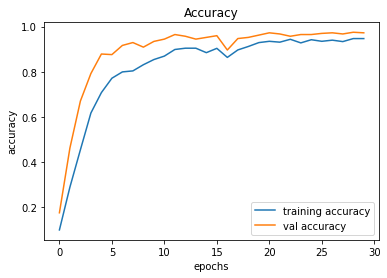

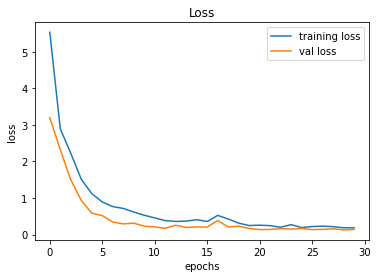

In [49]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [22]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv(os.path.join(cur_path,'dataset','Test.csv'))

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open('dataset/' + img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred))

#model.save('traffic_classifier.h5')

/Users/ilkaygirgin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2021-12-10 23:55:17.575359: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


0.9631828978622328


In [56]:
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
 
from keras.models import load_model
 
model = load_model('my_model_last.h5')
image = cv2.imread('519.jpg')
#image = load_img('519.jpg', target_size=(30, 30))
img = np.array(image)
#img = img / 255.0
#img = img.reshape(1,30,30,3)
label = model.predict_classes(img)
print(label)

ValueError: in user code:

    /Users/ilkaygirgin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py:1544 predict_function  *
        return step_function(self, iterator)
    /Users/ilkaygirgin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py:1527 run_step  *
        outputs = model.predict_step(data)
    /Users/ilkaygirgin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/training.py:1500 predict_step  *
        return self(x, training=False)
    /Users/ilkaygirgin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/ilkaygirgin/miniforge3/envs/tensorflow/lib/python3.9/site-packages/keras/engine/input_spec.py:227 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 47, 3)


In [10]:
!pip install -q tflite-model-maker
!pip install -q pycocotools
!pip install -q tflite-support

ERROR: Cannot install tflite-model-maker==0.1.0, tflite-model-maker==0.1.1, tflite-model-maker==0.1.2, tflite-model-maker==0.2.0, tflite-model-maker==0.2.1, tflite-model-maker==0.2.2, tflite-model-maker==0.2.3, tflite-model-maker==0.2.4, tflite-model-maker==0.2.5, tflite-model-maker==0.3.0, tflite-model-maker==0.3.1, tflite-model-maker==0.3.2, tflite-model-maker==0.3.3 and tflite-model-maker==0.3.4 because these package versions have conflicting dependencies.
ERROR: ResolutionImpossible: for help visit https://pip.pypa.io/en/latest/user_guide/#fixing-conflicting-dependencies
  ERROR: Command errored out with exit status 1:
   command: /Users/ilkaygirgin/miniforge3/envs/tensorflow/bin/python3.9 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/private/var/folders/nb/s2z_90891m960fy44xmbzhtr0000gn/T/pip-install-c9p5twb1/pycocotools_b7847a97e5da4d34a197b793286068c8/setup.py'"'"'; __file__='"'"'/private/var/folders/nb/s2z_90891m960fy44xmbzhtr0000gn/T/pip-install-c9p5twb1

  DEPRECATION: tflite-support was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. Discussion can be found at https://github.com/pypa/pip/issues/8368


In [20]:
!pip install tflite-model-maker==0.3.2

  Using cached tflite_model_maker-0.3.2-py3-none-any.whl (591 kB)
  Using cached librosa-0.8.1-py3-none-any.whl (203 kB)
  Using cached fire-0.4.0.tar.gz (87 kB)
  Preparing metadata (setup.py) ... done
  Using cached tensorflow_model_optimization-0.7.0-py2.py3-none-any.whl (213 kB)
  Using cached tensorflowjs-3.12.0-py3-none-any.whl (77 kB)
ERROR: Could not find a version that satisfies the requirement tensorflow>=2.4.0 (from tflite-model-maker) (from versions: none)
ERROR: No matching distribution found for tensorflow>=2.4.0


In [23]:
import tensorflow as tf
!pip install tensorflow-mac

ERROR: Could not find a version that satisfies the requirement tensorflow==2.7.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.7.0


In [25]:
pip list

Package                       Version
----------------------------- -------------------
absl-py                       0.10.0
appnope                       0.1.2
argcomplete                   1.12.3
argon2-cffi                   21.1.0
astunparse                    1.6.3
async-generator               1.10
attrs                         21.2.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
bayesian-optimization         1.2.0
bleach                        4.1.0
boto                          2.49.0
boto3                         1.20.23
botocore                      1.23.23
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    4.2.4
certifi                       2021.10.8
cffi                          1.15.0
charset-normalizer            2.0.9
click                         8.0.3
cloudpickle                   2.0.0
colorama                      0.4.4
crcmod                        1.7
cryptography                  36.0.0
